In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']

In [116]:
df = pd.read_csv('headup_detect_delay_test_0.3_0.9_1685593125955.csv')
# df = pd.read_csv('20230601_15_13_41_headup_detect_delay_test_0.3_0.9.csv')

df = df[1:]
max_fps = 30
df.loc[df['fps'] >= 30, 'fps'] = max_fps
resolution_map = {"360p": 0, "480p": 1, "720p": 2, "1080p": 3}
df['resolution'] = df['resolution'].replace(resolution_map)

df

,n_loop,frame_id,total,up,fps,resolution,delay
1,2,1.0,7,5,24,1,0.435979
2,3,2.0,7,5,24,1,0.435979
3,4,3.0,7,5,24,1,0.377442
4,5,4.0,7,6,24,1,0.369735
5,6,5.0,7,5,24,1,0.417884
...,...,...,...,...,...,...,...
833,834,833.0,19,3,24,0,0.814398
834,835,834.0,18,6,24,0,0.847359
835,836,835.0,18,4,24,0,0.955216
836,837,836.0,18,6,24,0,0.856604


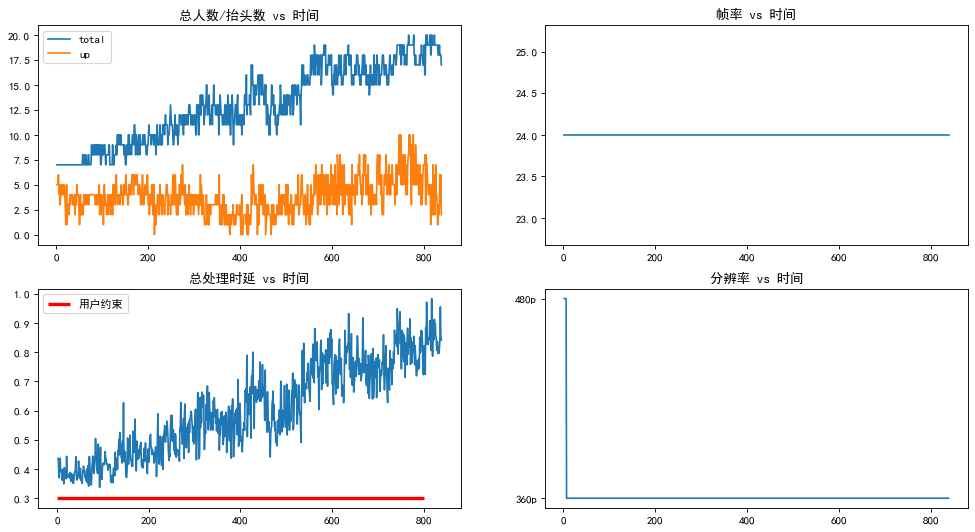

In [117]:
fig, axs = plt.subplots(2, 2, figsize=(15, 8), dpi=80)
axs[0,0].plot(df['n_loop'], df['total'], label='total')
axs[0,0].plot(df['n_loop'], df['up'], label='up')
axs[0,0].title.set_text('总人数/抬头数 vs 时间')
axs[0,0].legend()

axs[1,0].hlines(y=0.3, xmin=0, xmax=800, linewidth=3, color='r', label='用户约束')
axs[1,0].plot(df['n_loop'], df['delay'])
axs[1,0].title.set_text('总处理时延 vs 时间')
axs[1,0].legend()


axs[0,1].plot(df['n_loop'], df['fps'])
axs[0,1].title.set_text('帧率 vs 时间')

axs[1,1].set_yticks(np.arange(4))
axs[1,1].set_yticklabels(resolution_map.keys())
axs[1,1].plot(df['n_loop'], df['resolution'])
axs[1,1].title.set_text('分辨率 vs 时间')

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5), dpi=80)
axs[0].plot(df['n_loop'], df['face_detection'], label='face_detection')
axs[0].plot(df['n_loop'], df['face_alignment'], label='face_alignment')
axs[0].title.set_text('卸载节点 vs 时间')
axs[0].legend()